In [1]:
# Anaconda navigator에서 party 설치

In [2]:
library(party)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [4]:
# Sampling 편하게 하기

set.seed(1234)
library(caret) # 샘플링하는 라이브러리

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [7]:
samp <- createDataPartition(iris$Species, p=0.7, list=F)
samp

Resample1
2
4
5
6
7
9
10
11
12
13


In [8]:
# 학습용

data.tr <- iris[samp,]

# 테스트용
data.test <- iris[-samp,]

In [9]:
# 학습시키기
model.ctree <- ctree(Species ~ ., data=data.tr)

In [10]:
# 문제 및 정답 만들기
x <- subset(data.test, select = -Species)
y <- data.test$Species

In [16]:
# 검증하기
pred <- predict(model.ctree, x)
pred

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor virginica 
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  versicolor
[37] virginica  virginica  virginica  versicolor versicolor virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [17]:
# 예측력과 오분류표
mean(pred ==y)
table(pred, y)

[1] 0.9111111

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         3
  virginica       0          1        12

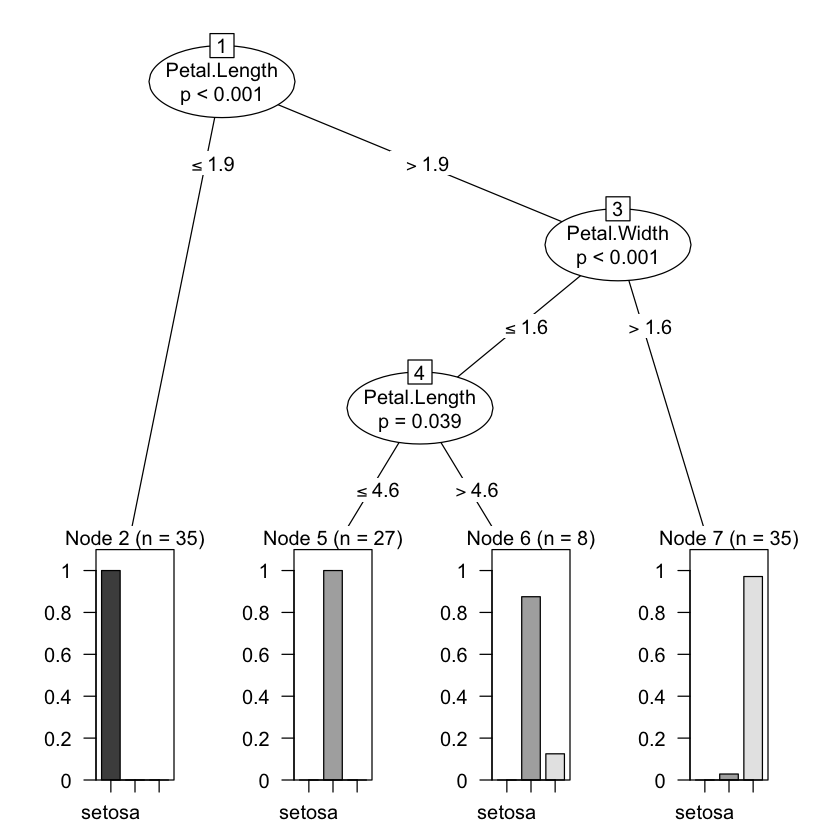

In [18]:
plot(model.ctree)